In [1]:
%load_ext autoreload
%autoreload

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

-

Settings

train = 0 </br>
valid = 4 </br>
test = 1 </br>
test' = 2 </br>

In [3]:
# Тип выборки
MODE = 1
# Номер переменной
VAR = 8
# Число кластеров с наименьшей MAE на рассмотрение
TOP = 5
# Длина участка визуализации
LEN = 100

-

In [4]:
data = pd.read_csv("./data/output_table.csv")
data = data[data["mode"].astype("int") == MODE]

In [5]:
data.loc[:, ["real 0", "real 64", "predicted 0", "predicted 64", "cluster_num", "mode"]]

,real 0,real 64,predicted 0,predicted 64,cluster_num,mode
18805,727.880323,7265.584369,70.154785,525.164246,2.0,1.0
18806,727.880323,7265.565539,70.154785,524.983459,2.0,1.0
18807,727.880323,7265.328225,70.154785,524.982117,2.0,1.0
18808,727.880323,7260.176266,70.154785,524.964966,2.0,1.0
18809,727.880323,7253.255389,70.154785,524.592896,2.0,1.0
...,...,...,...,...,...,...
307267,584.965983,4682.628577,71.173065,525.335571,0.0,1.0
307268,584.965983,4682.816777,71.173065,525.376038,0.0,1.0
307269,584.965983,4682.891913,71.173065,525.396973,0.0,1.0
307270,584.965983,4683.010549,71.173065,525.405334,0.0,1.0


Оценим переменные

In [6]:
real = [x for x in data.columns if "real" in x]
predicted = [x for x in data.columns if "predicted" in x]
err = abs(data[real].values - data[predicted].values)
err = err[data["mode"] == MODE]
pd.DataFrame([dict(zip(real, err.mean(axis=0)))]).T.sort_values(0)[:10]

,0
real 8,12.259426
real 13,13.263970
real 35,17.360601
real 12,20.115754
real 37,22.359837
real 33,26.741161
real 26,37.296270
real 63,40.615483
real 19,45.755831
real 31,49.347602


In [7]:
data["mode"].value_counts()

1.0    65296
Name: mode, dtype: int64

In [8]:
AE = abs(data[f"real {VAR}"] - data[f"predicted {VAR}"])
AE = pd.DataFrame(dict(AE=AE, cluster_num=data["cluster_num"]))

In [9]:
AE

,AE,cluster_num
18805,39.867908,2.0
18806,39.415764,2.0
18807,39.247327,2.0
18808,38.819100,2.0
18809,39.233203,2.0
...,...,...
307267,2.049708,0.0
307268,1.665673,0.0
307269,1.848385,0.0
307270,2.004781,0.0


In [10]:
top = [AE[AE["cluster_num"] == c]["AE"].mean() for c in np.arange(AE["cluster_num"].max())]
top = np.argsort(top)

In [11]:
top

array([4, 6, 0, 5, 7, 3, 2, 1])

-

# Визуализация

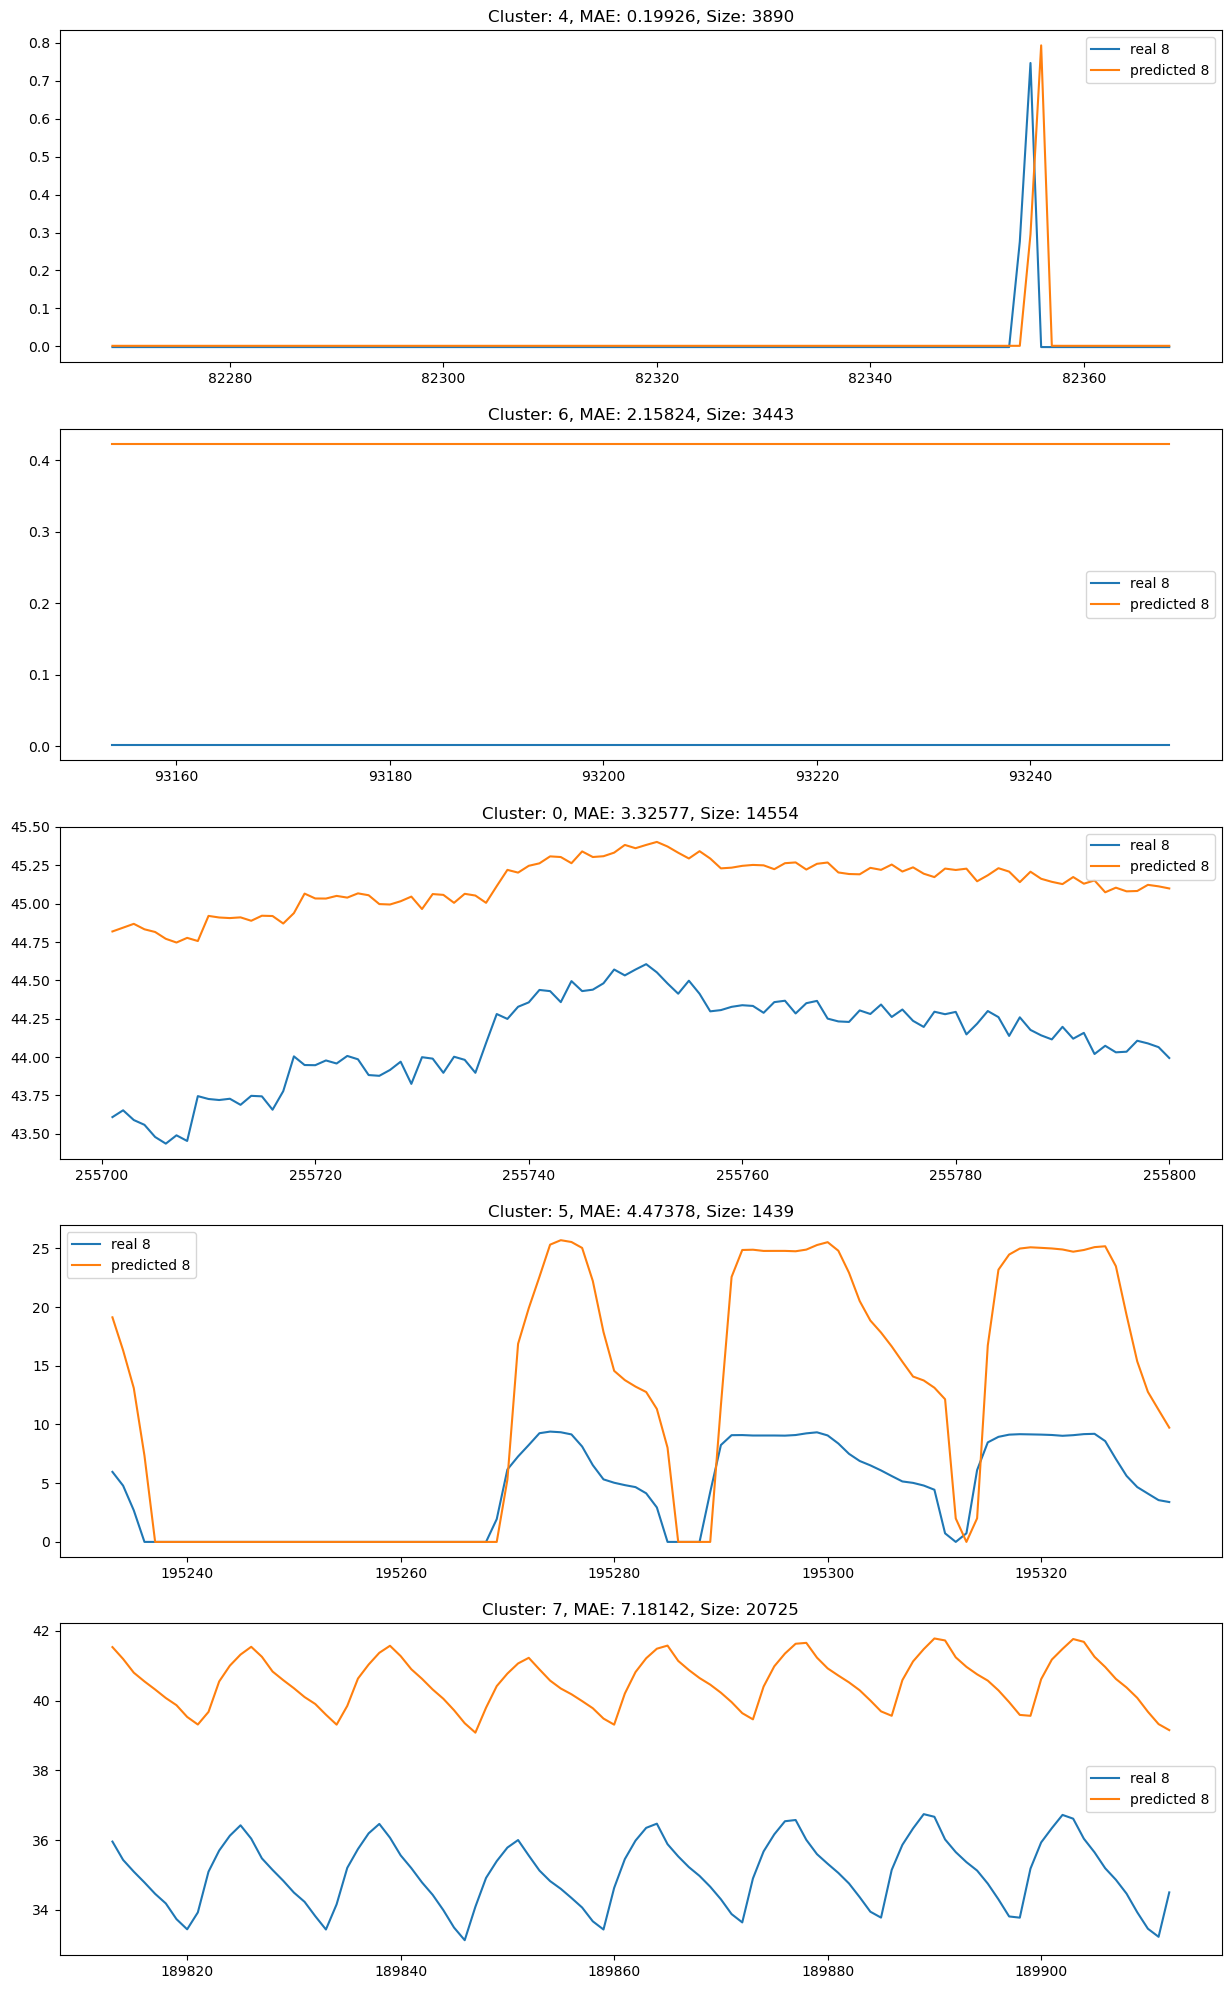

In [15]:
for i in range(TOP):
    #print(int(f"{i+1}1{TOP}"))
    plt.subplot(int(f"{TOP}1{i+1}"))
    index = AE["cluster_num"] == top[i]
    plt.title(f"Cluster: {top[i]}, MAE: {AE[index]['AE'].mean():.5f}, Size: {sum(AE['cluster_num'] == top[i])}")
    cluster = data[[f"real {VAR}", f"predicted {VAR}"]][index]
    
    # find continous index
    cont = np.split(cluster, np.where(np.diff(cluster.index) > 1)[0] + 1)
    chunk = [x for x in cont if len(x) > LEN][0]
    plt.plot(chunk[:LEN])
    plt.legend(chunk.columns)
    
plt.gcf().set_size_inches(15, 5 * TOP)